 **Made By :-  Ashu Kumar**

# <center>Exploratory Data Analysis - Terrorism</center>

### Import Libraries

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
%matplotlib inline
sns.set(color_codes=True)



**Load the dataset into jupyter notebook**

In [2]:
df = pd.read_csv('terrorism.csv',encoding='latin1')

C:\Users\91965\AppData\Local\Temp\ipykernel_4024\558031174.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('terrorism.csv',encoding='latin1')


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [4]:
df.shape

(181691, 135)

**Merge the kill and wounded columns and make one Casulaties columns.**

In [5]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['casualties'] = df['nkill'] + df['nwound']

**Select and keep important columns, and eliminate less relevant ones.**

In [6]:
df = df[['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','success','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','dbsource','casualties']]
df.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,dbsource,casualties
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,MANO-D,Unknown,PGIS,1.0
1,197000000002,1970,0,0,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,PGIS,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,1,Assassination,Journalists & Media,Unknown,Unknown,PGIS,1.0
3,197001000002,1970,1,0,Greece,Western Europe,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,PGIS,0.0
4,197001000003,1970,1,0,Japan,East Asia,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,PGIS,0.0


**Rename the columns of dataset.**

In [7]:
df.rename(columns={'eventid':'ID', 'iyear':'year', 'imonth':'month', 'iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','targtype1_txt':'targtype','gname':'groupname','weaptype1_txt':'weapontype','dbsource':'source'},inplace=True)

**Conduct an examination of the columns present in the dataset.**

In [8]:
df.columns

Index(['ID', 'year', 'month', 'day', 'country', 'region', 'success',
       'attacktype', 'targtype', 'groupname', 'weapontype', 'source',
       'casualties'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          181691 non-null  int64  
 1   year        181691 non-null  int64  
 2   month       181691 non-null  int64  
 3   day         181691 non-null  int64  
 4   country     181691 non-null  object 
 5   region      181691 non-null  object 
 6   success     181691 non-null  int64  
 7   attacktype  181691 non-null  object 
 8   targtype    181691 non-null  object 
 9   groupname   181691 non-null  object 
 10  weapontype  181691 non-null  object 
 11  source      181691 non-null  object 
 12  casualties  181691 non-null  float64
dtypes: float64(1), int64(5), object(7)
memory usage: 18.0+ MB


**Obtain the statistical summary of the dataset, the 'describe' function was employed.**

In [10]:
df.describe()

,ID,year,month,day,success,casualties
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.889598,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,0.313391,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,1.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,1.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,9574.000000


**Conduct an examination of the distinct values present in each column of the dataset.**

In [11]:
df.nunique()

ID            181691
year              47
month             13
day               32
country          205
region            12
success            2
attacktype         9
targtype          22
groupname       3537
weapontype        12
source            26
casualties       345
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [12]:
df.isnull().sum()

ID            0
year          0
month         0
day           0
country       0
region        0
success       0
attacktype    0
targtype      0
groupname     0
weapontype    0
source        0
casualties    0
dtype: int64

**Conducting an assessment to identify and examine duplicate values within the dataset.**

In [13]:
df.duplicated().sum()

0

## Data Visualization

**Total Number of Terrorist Attack per year**

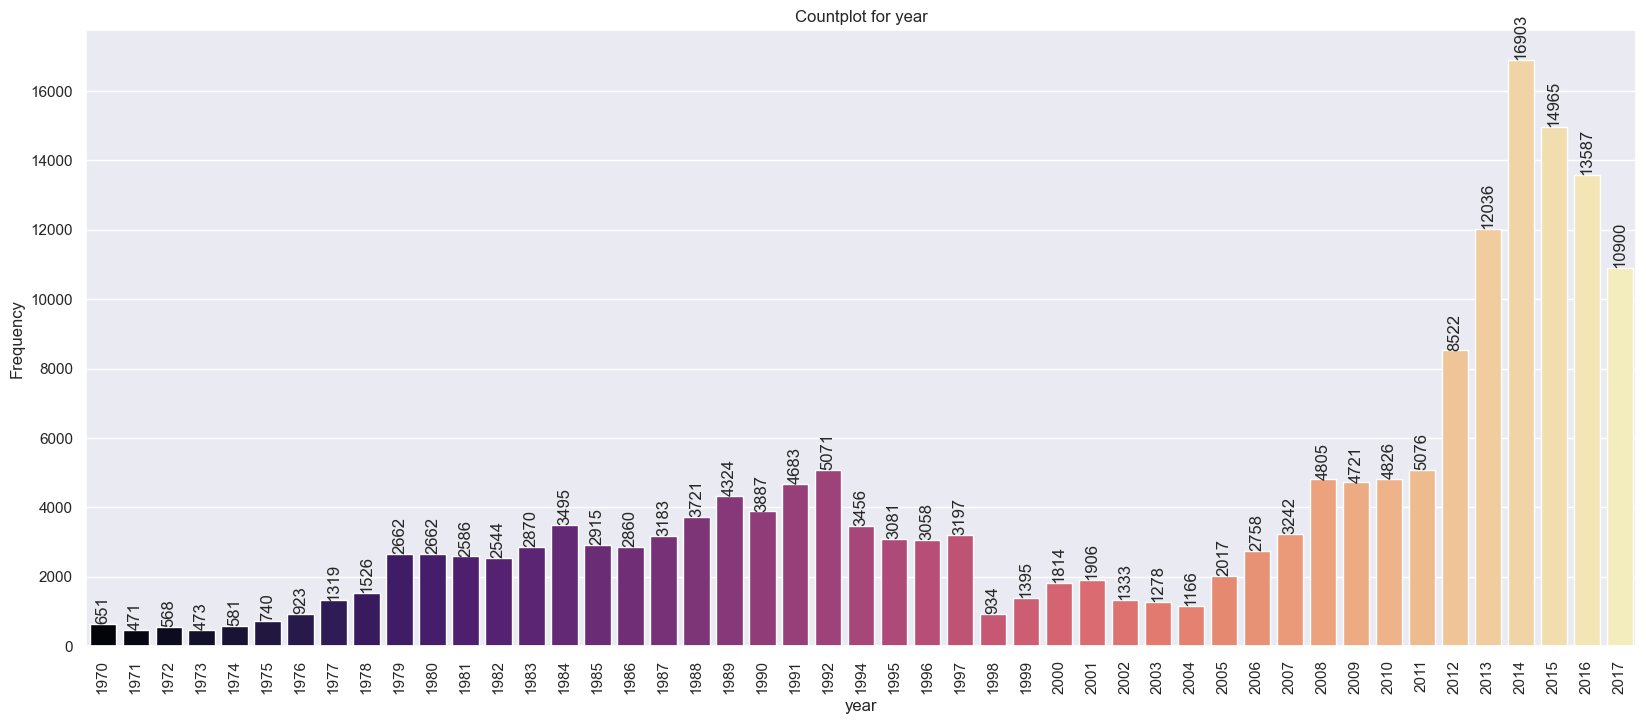

In [14]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df, x='year', palette='magma')
ax.bar_label(ax.containers[0], rotation=90)
plt.title('Countplot for year')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

The year 1971 marked the lowest incidence of terrorist attacks, while the peak occurred in 2014. Subsequently, there has been a discernible decline in terrorist attacks.

**Countplot of Categorical Variable**

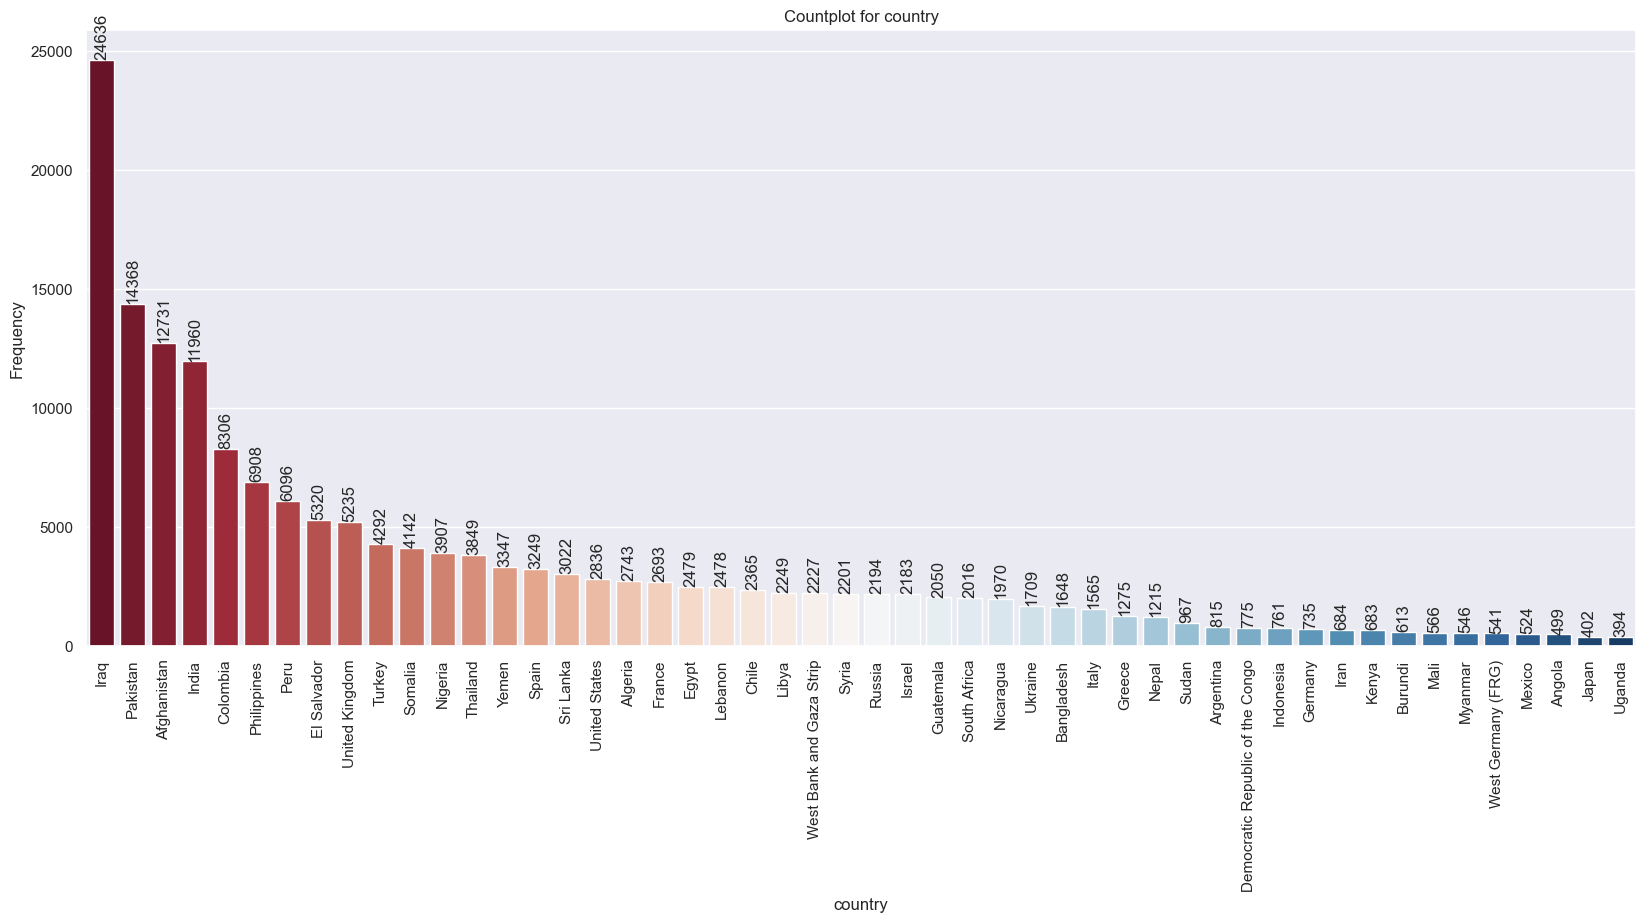

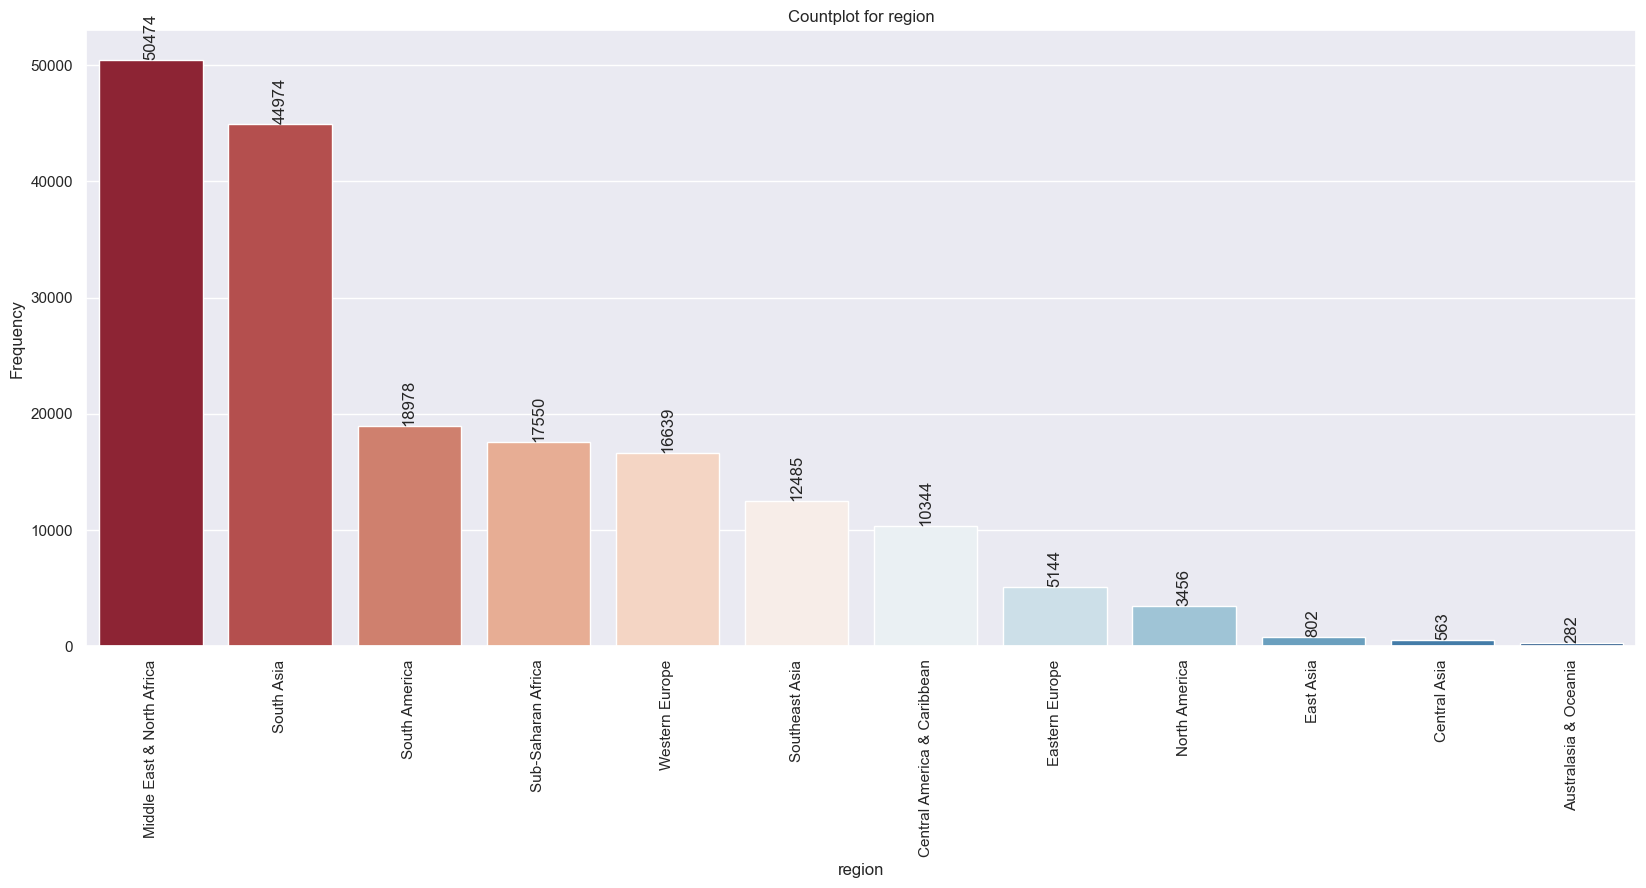

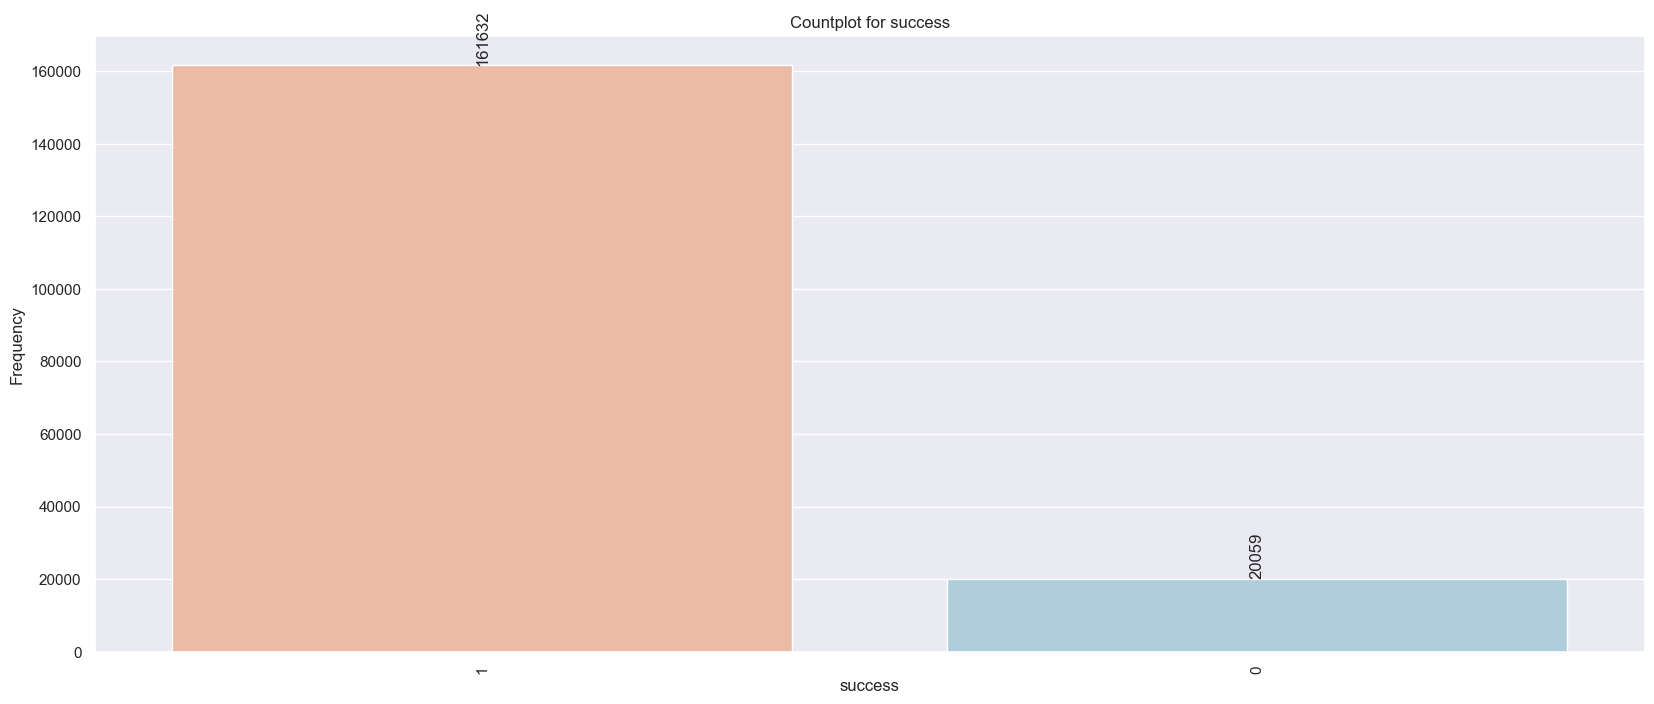

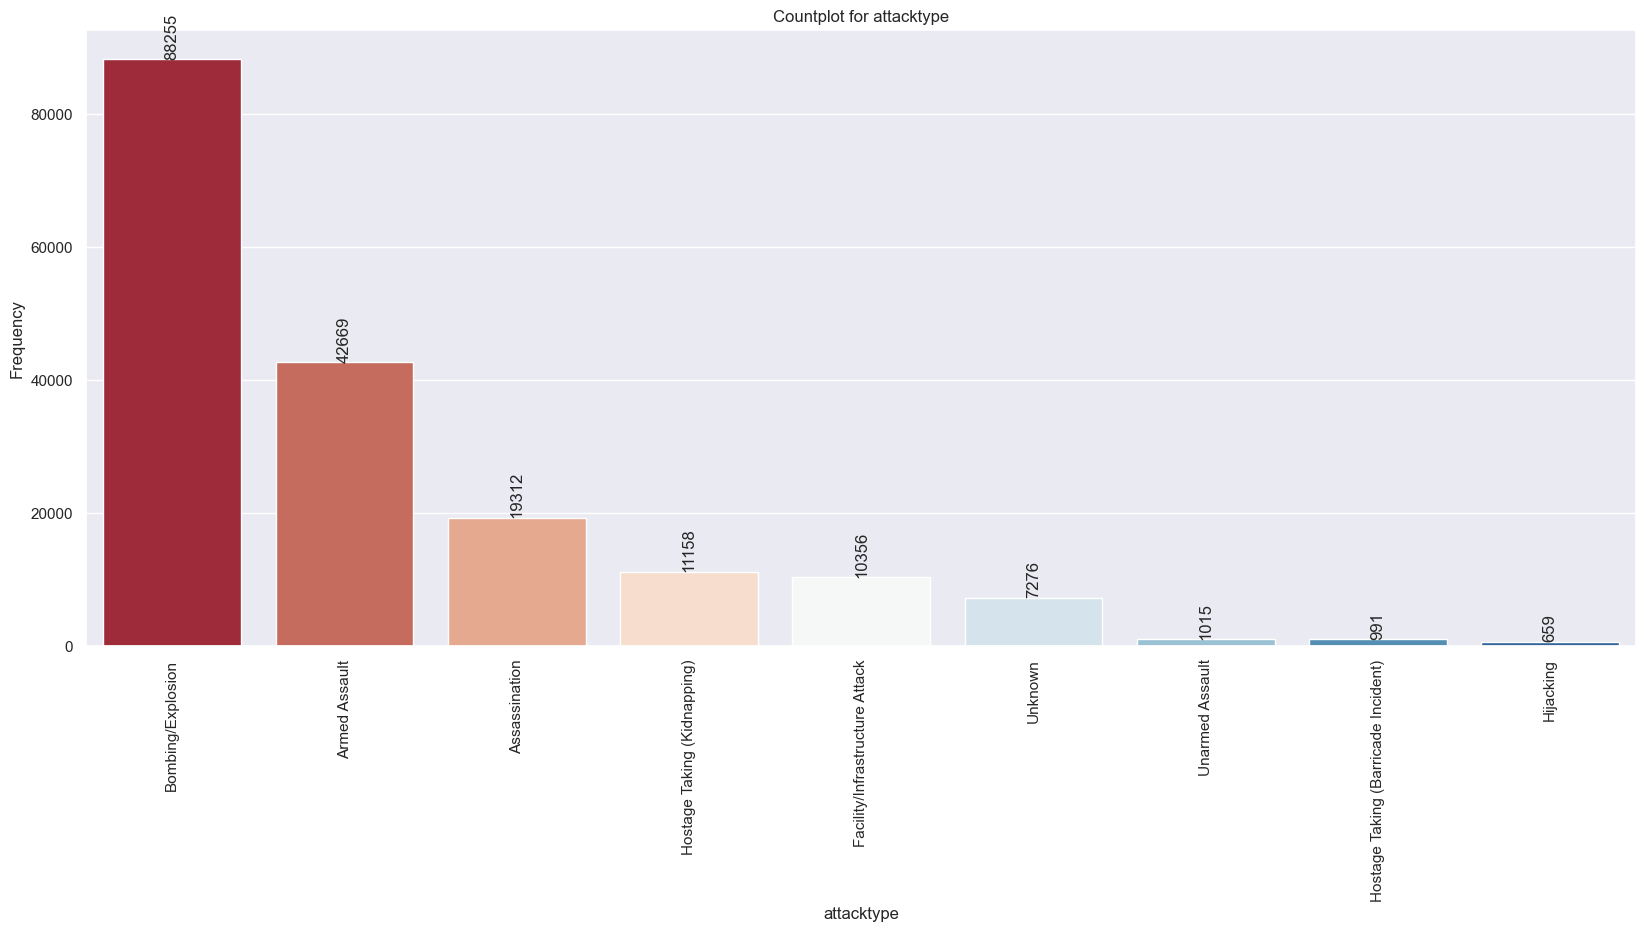

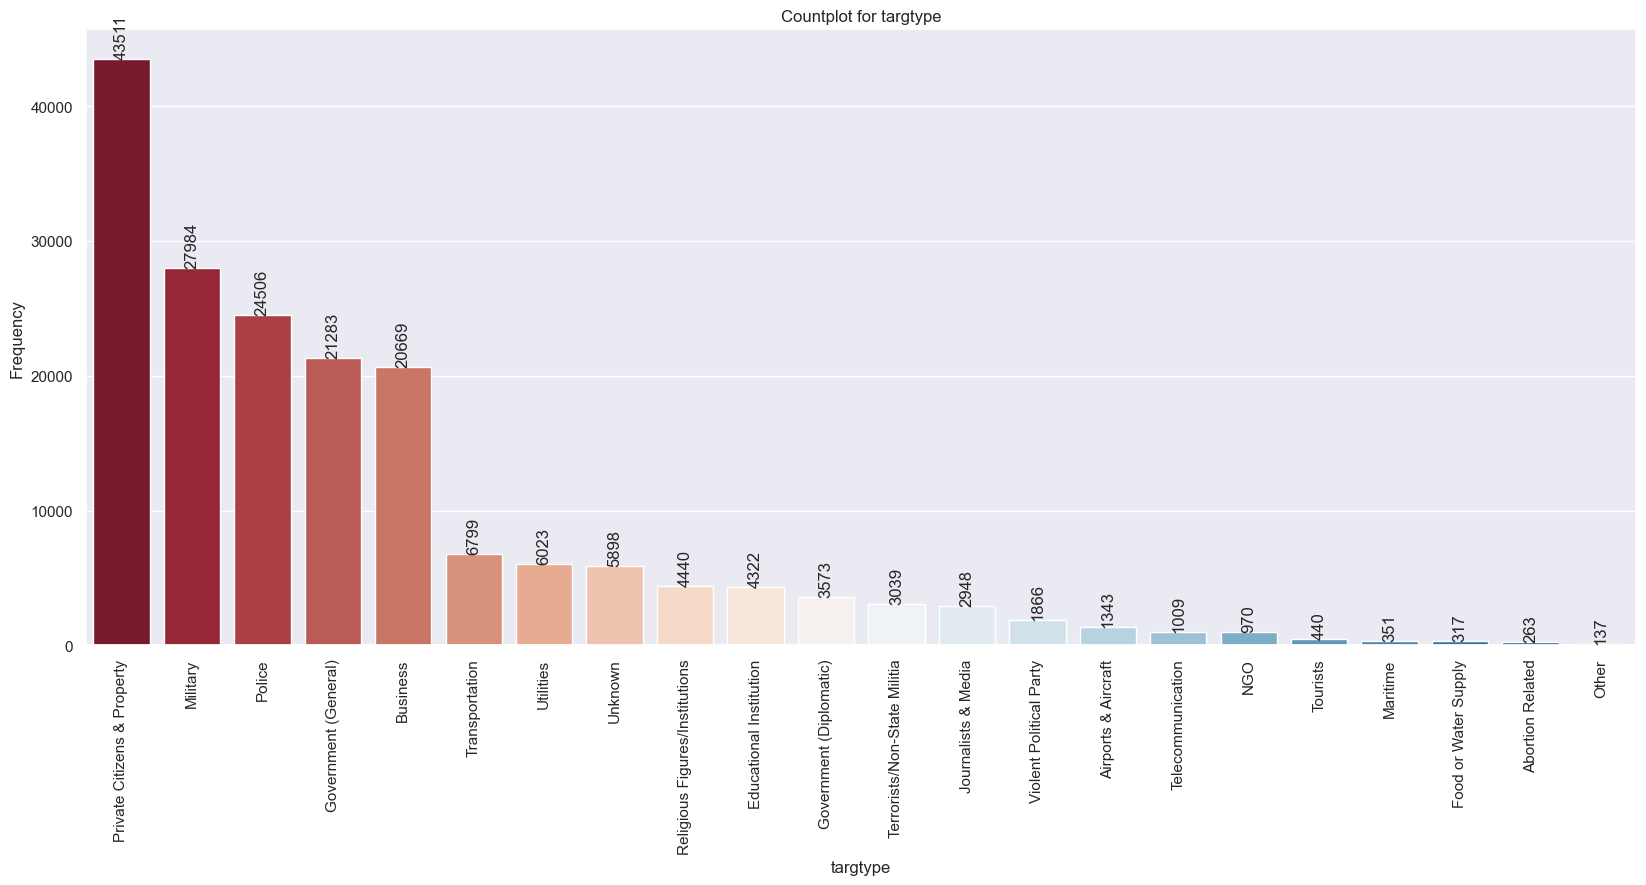

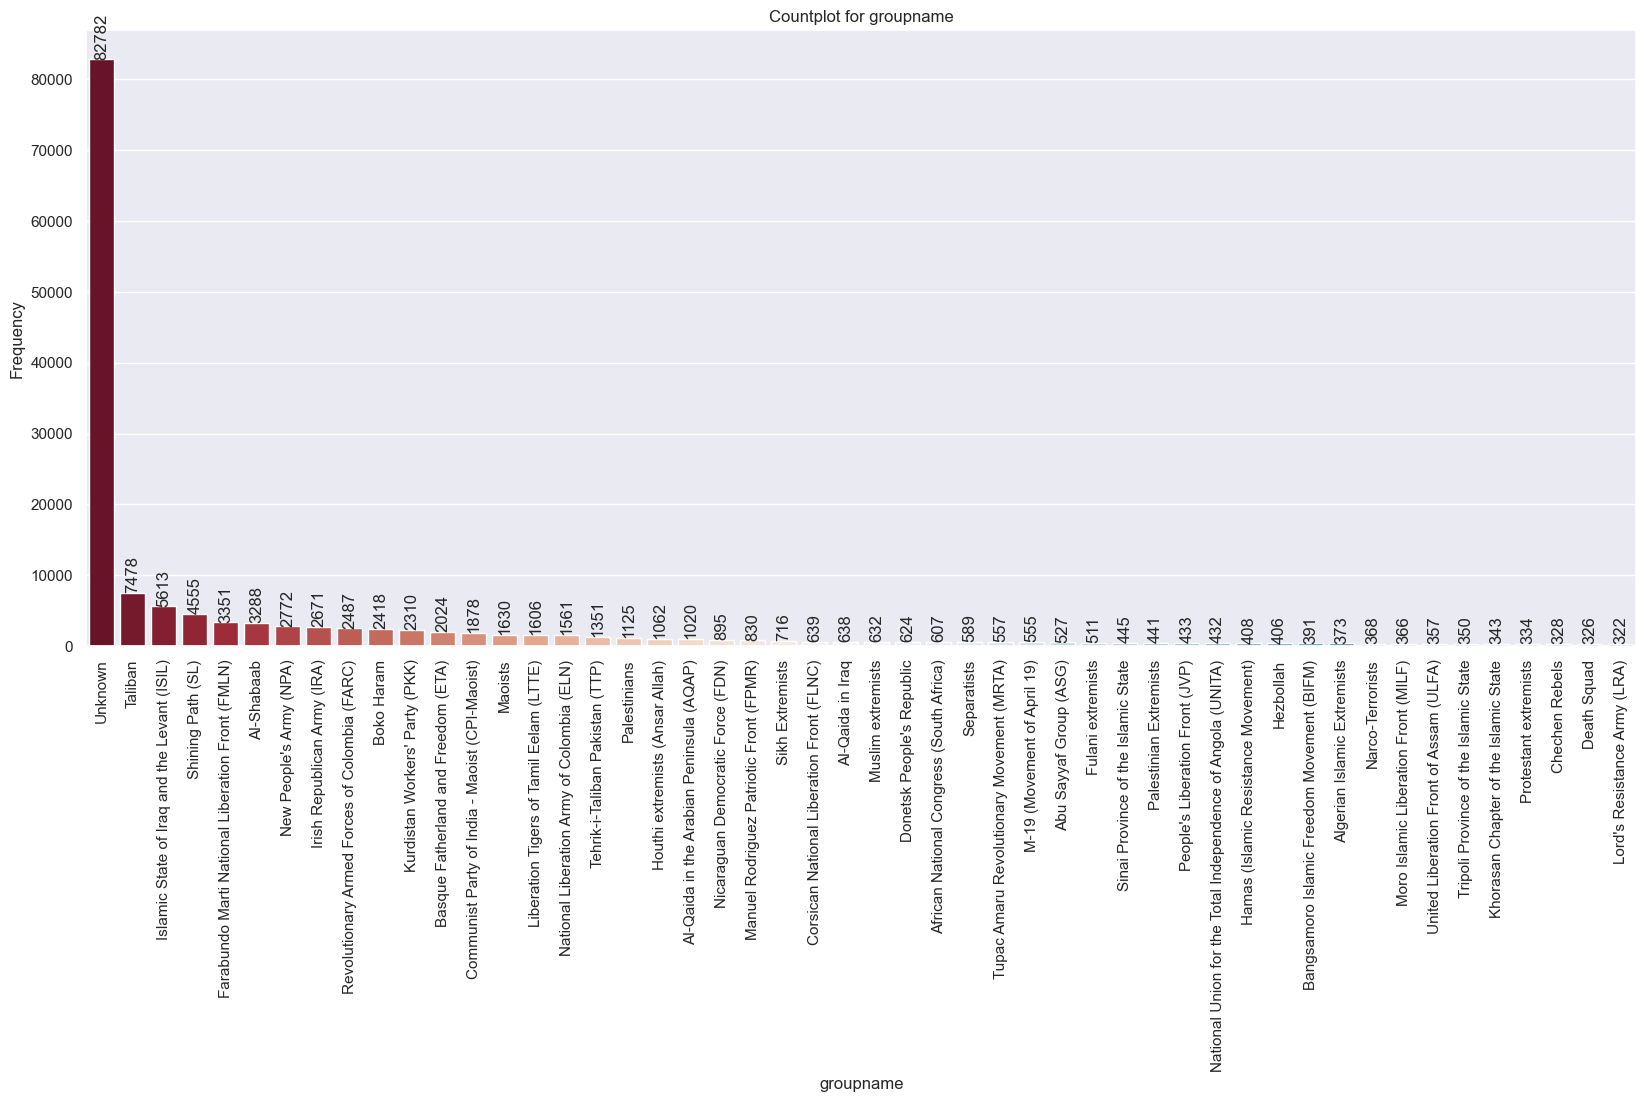

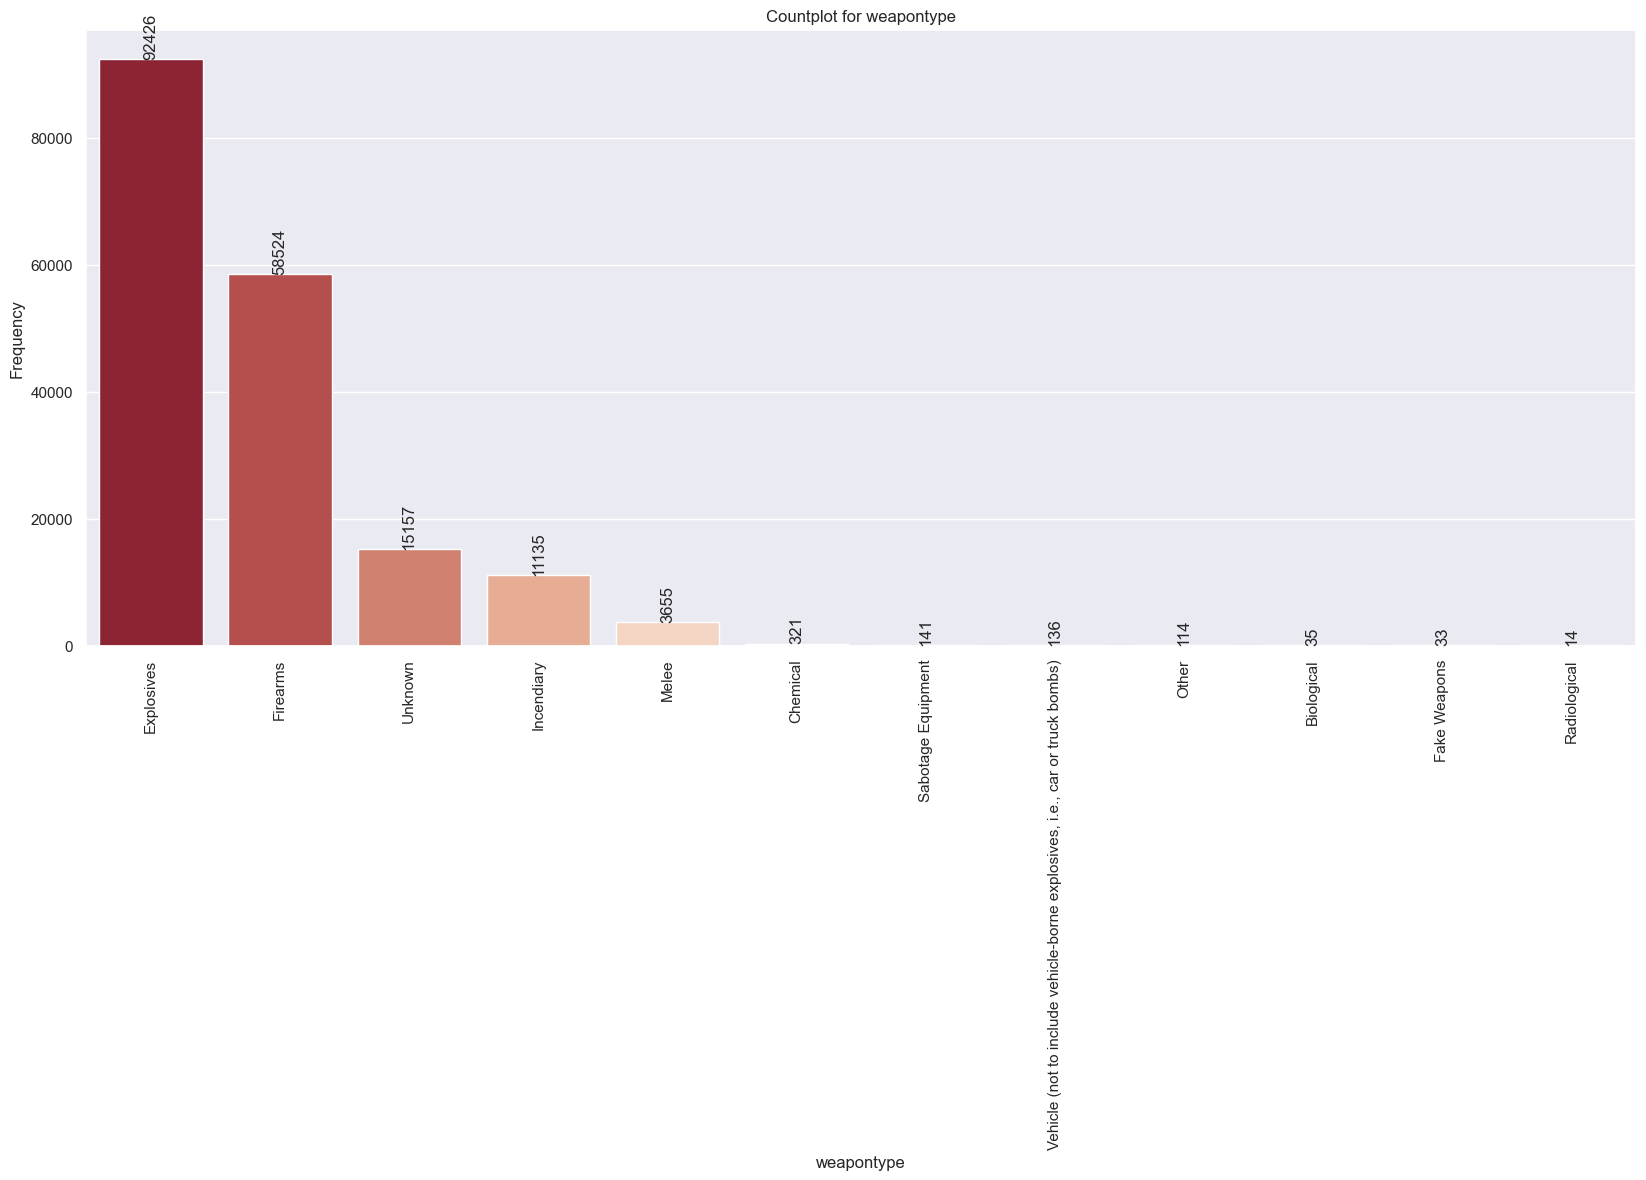

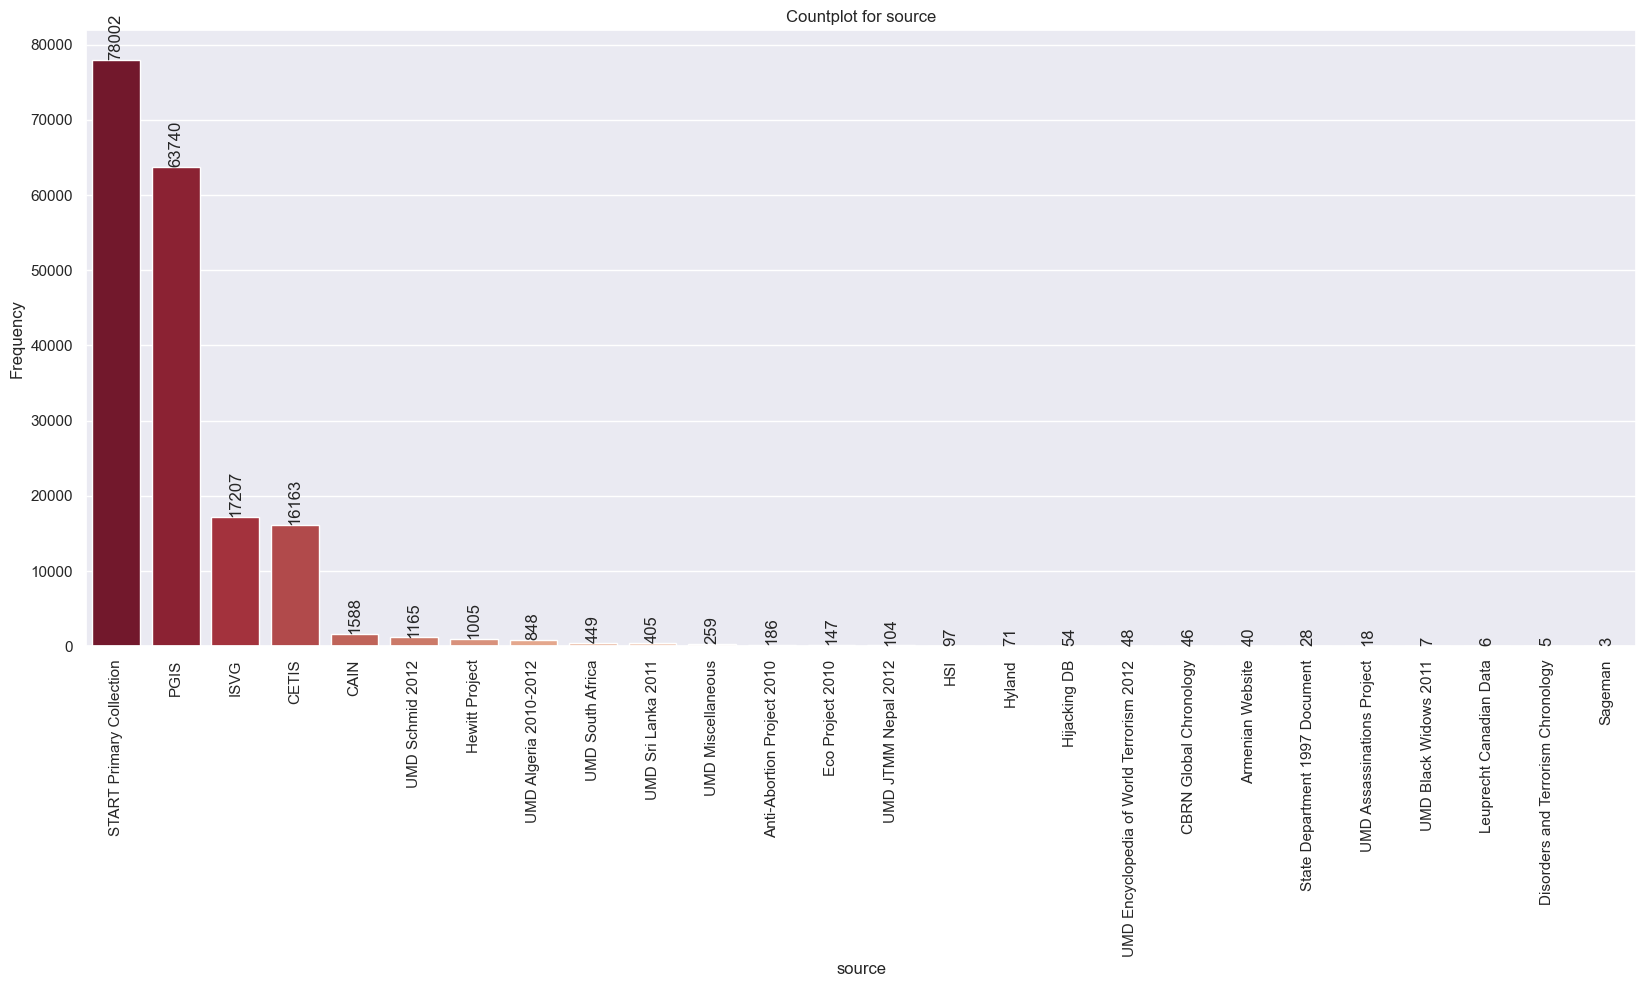

In [15]:
cat_var = ['country','region','success','attacktype','targtype','groupname','weapontype','source']
for column in cat_var:
    plt.figure(figsize=(20, 8))
    top_50 = df[column].value_counts().nlargest(50)
    ax = sns.countplot(data=df, x=column, palette='RdBu',order=top_50.index)
    ax.bar_label(ax.containers[0], rotation=90)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Upon analyzing the aforementioned visual representations, the following insights emerge:

1. Iraq has experienced the highest incidence of terrorist attacks, totaling nearly 25,000, with Pakistan and Afghanistan following closely in the rankings.
2. The region with the highest incidence of terrorist attacks is the Middle East, followed by South Asia.
3. Approximately 161,000 terrorist attacks were executed successfully, whereas nearly 20,000 terrorist attacks met with failure.
4. The preferred modus operandi of terrorists predominantly involves the use of explosives or bombings, followed by armed assaults.
5. In terms of target selection, private citizens and their properties are the most frequently victimized, with military and police installations ranking as secondary targets.
6. Excluding incidents involving entities categorized as 'unknown,' it is noteworthy that the groups Taliban and ISIL (Islamic State of Iraq and the Levant) were responsible for a significant number of terrorist attacks.

**Total Casualties per Year**

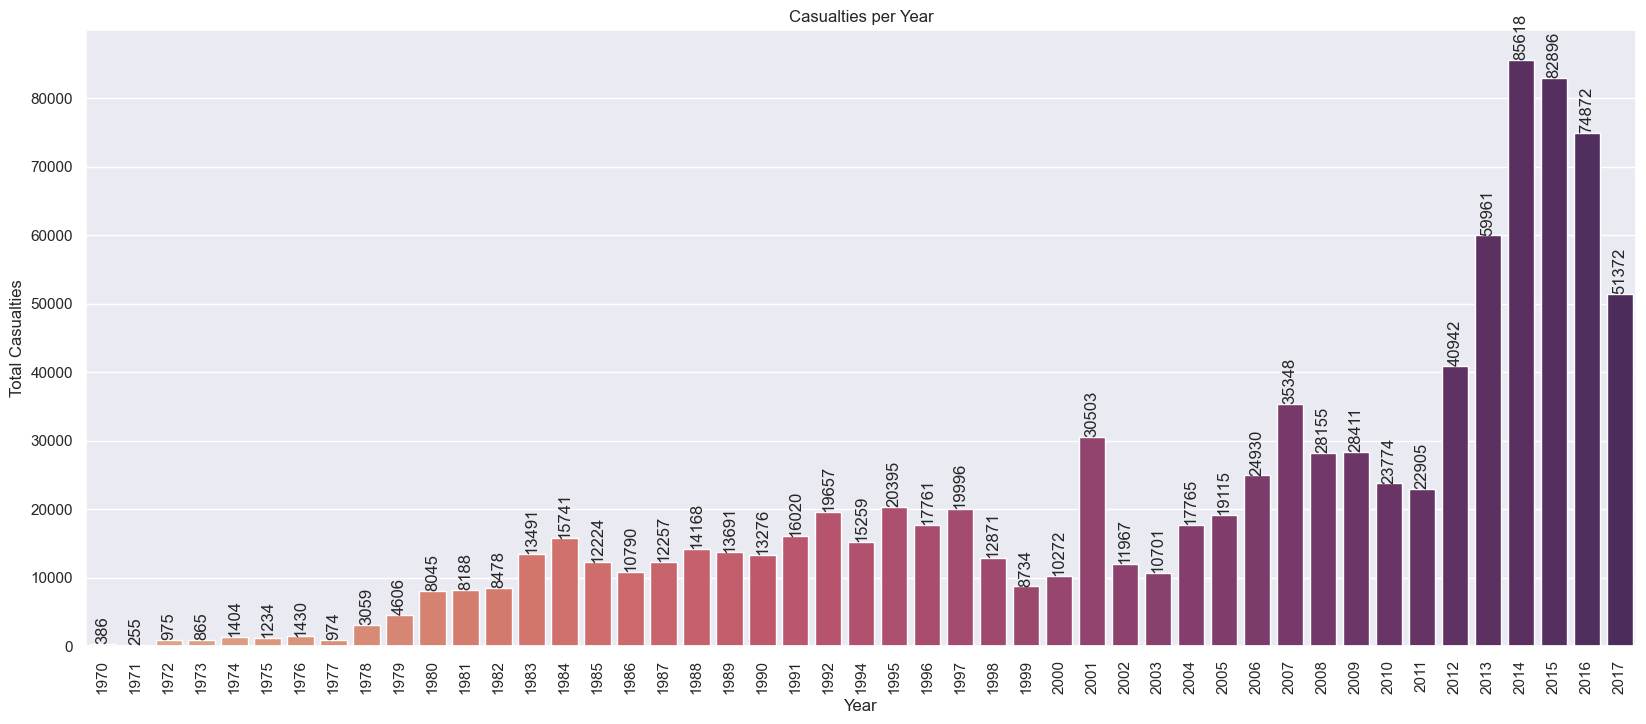

In [16]:
plt.figure(figsize=(20, 8))
yearly_casualties = df.groupby('year')['casualties'].sum().reset_index()
ax = sns.barplot(data=yearly_casualties, x='year', y='casualties', palette='flare')
ax.bar_label(ax.containers[0],rotation= 90)
plt.title('Casualties per Year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.show()

The year 1971 marked the lowest incidence of casualties, while the peak occurred in 2014. Subsequently, there has been a discernible decline in casualties.

**Region Casualties per Year**

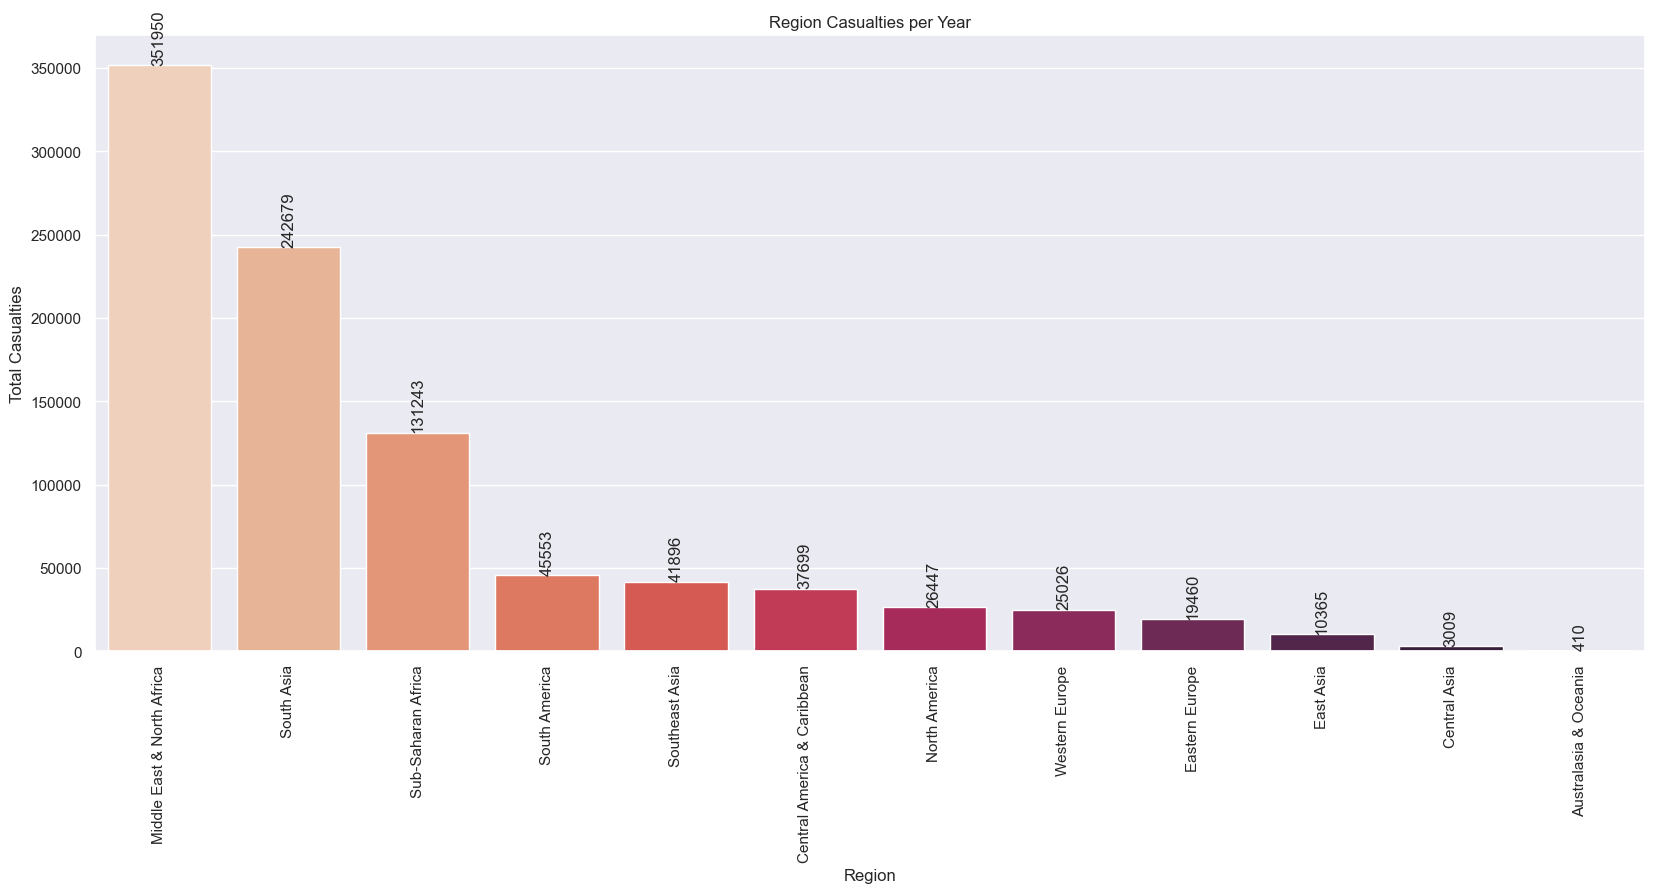

In [17]:
plt.figure(figsize=(20, 8))
yearly_casualties = df.groupby('region')['casualties'].sum().reset_index()
yearly_casualties = yearly_casualties.sort_values(by='casualties', ascending=False)  # Sort by casualties in descending orde
ax = sns.barplot(data=yearly_casualties, x='region', y='casualties', palette='rocket_r')
ax.bar_label(ax.containers[0],rotation= 90)
plt.title('Region Casualties per Year')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Casualties')
plt.show()

The region with the highest incidence of Casualties is the Middle East, followed by South Asia.